# 課題0710

そのまま課題ファイルで編集しないでください。課題ファイルを複製してから課題を回答してください。

In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")

In [31]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


## 課題1

以下の図を再現してください

- 年齢の分布を、異なる階級幅を使って、4つのサブプロットをわけて描画する
   - 階級幅を適当で決めてよい
- 各サブプロットには、
    - x軸ラベル、y軸ラベル、サブプロット番号(a-d)を指定する
    - 水平方向のグリッド線を追加する
    - ヒストグラムの色を`lightblue`に変更する

![](./Figure1.png)

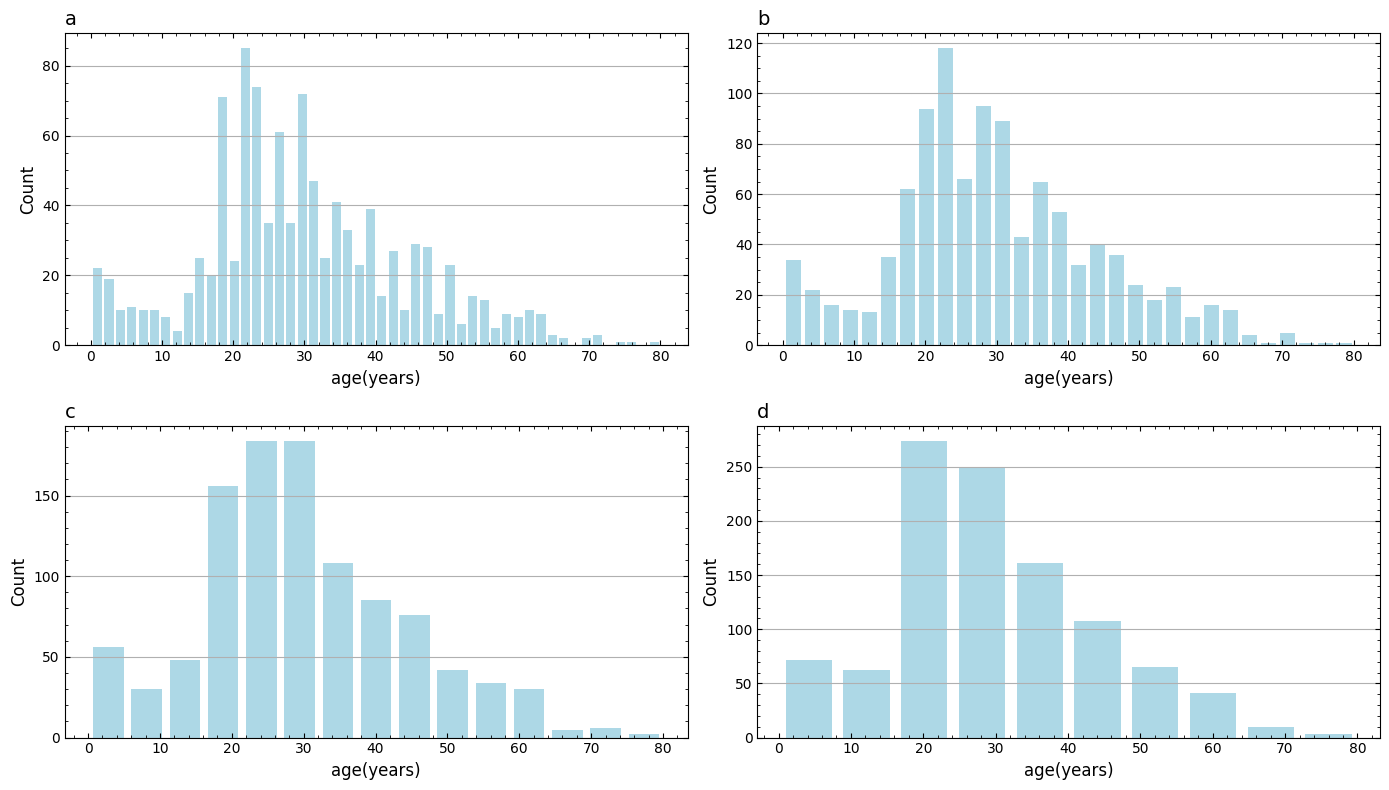

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ages = df['age'].dropna()

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

bins_list = [50,30,15,10]
y_max_values = [80, 120, 150, 250]
y_major_ticks = [20, 20, 50, 50]

for i, ax in enumerate(axs.flat):

    bin_width = bins_list[i]
    ax.hist(ages, bins=bin_width, color='lightblue', rwidth=0.8)
    
    ax.set_xlabel('age(years)', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{chr(97 + i)}', loc='left', fontsize=14)
     
    ax.tick_params(axis='x', which='both', direction='in', top=True)
    ax.tick_params(axis='y', which='both', direction='in', right=True)

    y_max = y_max_values[i]
    y_major = y_major_ticks[i]
    ax.set_yticks(np.arange(0, y_max + 1, y_major)) 
    ax.minorticks_on()
    ax.grid(axis='y')
   
plt.tight_layout()
plt.show()


## 課題2

以下の図を再現してください

- 男性乗客と女性乗客の年齢の分布をそれぞれ描画する
- 全乗客の年齢分布を示す灰色ヒストグラムも描画する
- 図のタイトル、x軸ラベル、y軸ラベル、凡例を設定する

![](./Figure2.png)

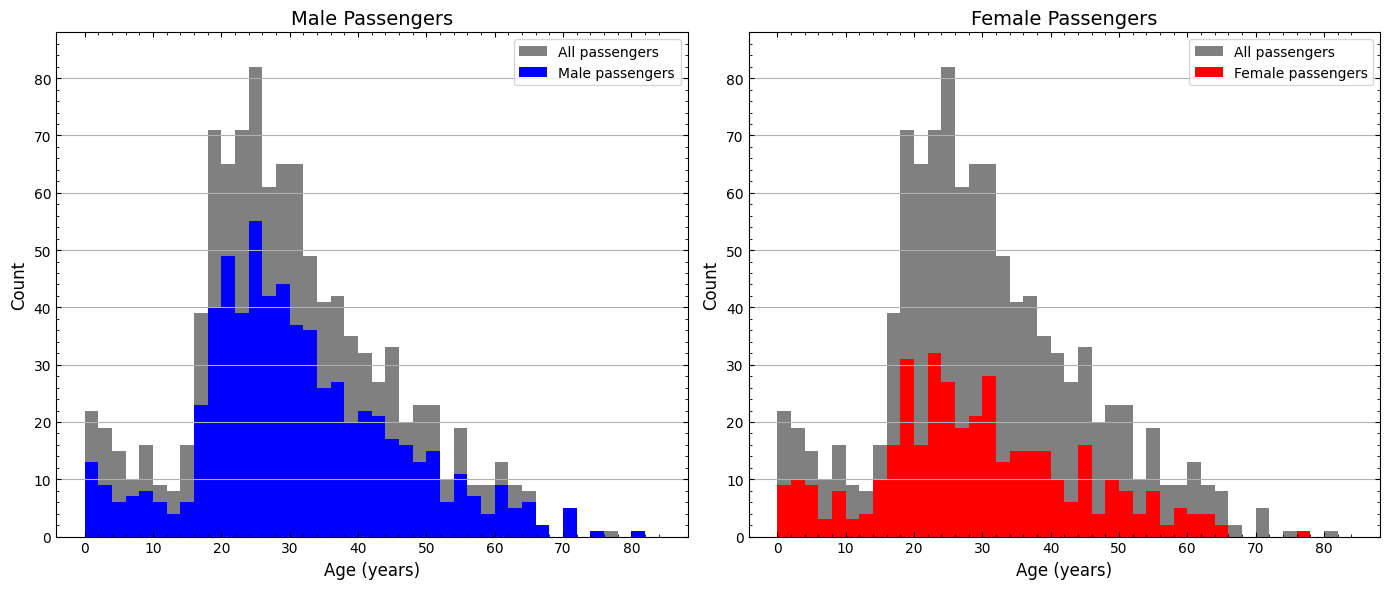

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ages = df['age'].dropna()
ages_male = df[df['sex'] == 'male']['age'].dropna()
ages_female = df[df['sex'] == 'female']['age'].dropna()

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].hist(ages, bins=range(0, 85, 2), color='gray', label='All passengers')
axs[0].hist(ages_male, bins=range(0, 85, 2), color='Blue', label='Male passengers')  
axs[0].set_title('Male Passengers', fontsize=14)
axs[0].set_xlabel('Age (years)', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].legend()
axs[0].tick_params(axis='x', which='both', direction='in', top=True)
axs[0].tick_params(axis='y', which='both', direction='in', right=True)

axs[1].hist(ages, bins=range(0, 85, 2), color='gray', label='All passengers')
axs[1].hist(ages_female, bins=range(0, 85, 2), color='Red', label='Female passengers')  
axs[1].set_title('Female Passengers', fontsize=14)
axs[1].set_xlabel('Age (years)', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].legend()
axs[1].tick_params(axis='x', which='both', direction='in', top=True)
axs[1].tick_params(axis='y', which='both', direction='in', right=True)

for ax in axs:
    ax.set_xticks(np.arange(0, 85, 10)) 
    ax.set_xticks(np.arange(0, 85, 2), minor=True)
    ax.set_yticks(np.arange(0, 90, 10)) 
    ax.set_yticks(np.arange(0, 90, 2), minor=True)  
    ax.grid(axis='y')  

plt.tight_layout()
plt.show()
